Packages

In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report , mean_absolute_error  ,mean_squared_error


In [4]:
df = pd.read_csv('50_Startups.csv')

In [5]:
print("data shape:",df.shape,"\n")
print("data head : \n")
df.tail()

data shape: (50, 5) 

data head : 



,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,79889.457000,121344.639600,211025.097800,112012.639200
std,54517.564309,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,111060.697500,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [11]:
print(df.columns.tolist())

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


In [12]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
#Handle the Nan values 
nan =[]
for column in df.columns :
    if df[column].isna().sum():
        nan.append(column)
print(nan)  

[]


In [14]:
#fill the nan values with the mean
for column in nan:
    df[column].fillna(df[column].mean(),inplace=True)

In [15]:
df.isna().sum().sum()

0

In [16]:
df.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [17]:
#encoder=LabelEncoder()
#df["State"]=encoder.fit_transform(df["State"])
    
    

In [18]:
#df.State.value_counts()

In [19]:

print(df["State"].unique())

['New York' 'California' 'Florida']


In [20]:
#one_hot_encoder = OneHotEncoder()
#df_temp = one_hot_encoder.fit_transform(df["State"].values.reshape(-1, 1)).toarray()

In [21]:
# Get newly encoded columns and concat them to the Dataframe
#encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(), data = df_temp)
#encodings = encodings.astype(int)
#dataframe = pd.concat([df,encodings] , axis=1)


In [22]:
#df.State.value_counts()

In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Convert "State" column to categorical type
df["State"] = df["State"].astype("category")

# Create instance of OneHotEncoder
encoder = OneHotEncoder()

# Encode the "State" column
encoded_states = encoder.fit_transform(df[["State"]])

# Convert the encoded states to a dataframe
encoded_states_df = pd.DataFrame(encoded_states.toarray(), columns=encoder.categories_)

# Concatenate the encoded states dataframe with the original dataframe
df_encoded = pd.concat([df, encoded_states_df], axis=1)

# Print the result
print(df_encoded.head())

   R&D Spend  Administration  Marketing Spend       State     Profit  \
0   165349.2       136897.80        471784.10    New York  192261.83   
1   165349.2       151377.59        443898.53  California  191792.06   
2   165349.2       101145.55        407934.54     Florida  191050.39   
3   165349.2       118671.85        383199.62    New York  182901.99   
4   165349.2        91391.77        366168.42     Florida  166187.94   

   (California,)  (Florida,)  (New York,)  
0            0.0         0.0          1.0  
1            1.0         0.0          0.0  
2            0.0         1.0          0.0  
3            0.0         0.0          1.0  
4            0.0         1.0          0.0  


In [24]:
df.head

<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   165349.20       151377.59        443898.53  California  191792.06
2   165349.20       101145.55        407934.54     Florida  191050.39
3   165349.20       118671.85        383199.62    New York  182901.99
4   165349.20        91391.77        366168.42     Florida  166187.94
5   165349.20        99814.71        362861.36    New York  156991.12
6   165349.20       147198.87        127716.82  California  156122.51
7   165349.20       145530.06        323876.68     Florida  155752.60
8   165349.20       148718.95        311613.29    New York  152211.77
9   165349.20       108679.17        304981.62  California  149759.96
10  165349.20       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  

In [25]:
x=df[["R&D Spend","Administration","Marketing Spend"]]
y=df["Profit"]
x=x.to_numpy()
y=y.to_numpy()
x


array([[165349.2 , 136897.8 , 471784.1 ],
       [165349.2 , 151377.59, 443898.53],
       [165349.2 , 101145.55, 407934.54],
       [165349.2 , 118671.85, 383199.62],
       [165349.2 ,  91391.77, 366168.42],
       [165349.2 ,  99814.71, 362861.36],
       [165349.2 , 147198.87, 127716.82],
       [165349.2 , 145530.06, 323876.68],
       [165349.2 , 148718.95, 311613.29],
       [165349.2 , 108679.17, 304981.62],
       [165349.2 , 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [26]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [27]:
print(df.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [28]:
x_train ,x_test,y_train ,y_test =train_test_split(x,y,test_size =0.3, random_state =42)


In [29]:
model =LinearRegression()
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
data = pd.DataFrame(data={"predicted ":y_pred})
print(data.head())

      predicted 
0  121034.956000
1   82030.427786
2   89750.474503
3   47036.172175
4  125298.983958


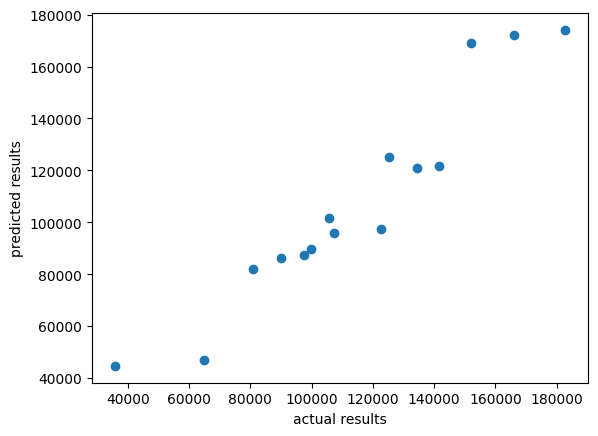

In [30]:
#import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('actual results')
plt.ylabel('predicted results')
plt.show()

In [31]:
testing_data_model_score = model.score(x_test,y_test)
print("Model Score /Performance on Testing data",testing_data_model_score)
training_data_model_score = model.score(x_train,y_train)
print("Model Score /Performance on training data",training_data_model_score)

Model Score /Performance on Testing data 0.88745955547764
Model Score /Performance on training data 0.920238943786034


In [32]:
# evaluate the model 
from sklearn.metrics import r2_score
r2Score =r2_score(y_pred,y_test)
print("R2 score of model is :",r2Score*100)

R2 score of model is : 89.57937852884108


In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print ("Mean Absolute Error is: ",mae)

Mean Absolute Error is:  10494.071861235278


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print("Mean Squarred Error is :",mse*100)

Mean Squarred Error is : 15834451660.262331


In [35]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print("Root Squarred Error is :",rmse*100)

Root Squarred Error is : 1258350.1762332427
